In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [ ]:
# creat file path to csv
data_df= pd.read_csv("../data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
data_df.head()

#delete unecessary columns
covid_deaths_df= data_df[['Data As Of','State','Start Date','End Date','Sex',
                                     'Age Group','COVID-19 Deaths','Total Deaths','Pneumonia and COVID-19 Deaths',
                                     ]]
covid_deaths_df.head(52)        


In [ ]:
covid_deaths_df.dtypes

In [ ]:
#removing male/female
all_sexes_covid_deaths_df= covid_deaths_df.loc[(covid_deaths_df['Sex']=='All Sexes')&(covid_deaths_df['Age Group']=='All Ages')]
all_sexes_covid_deaths_df.head(52)

In [ ]:
#confirming which states are under column state in order to filter out any unwanted "states"
unique_values = all_sexes_covid_deaths_df['State'].unique()
unique_values

In [ ]:
#filter out unwanted data in the States column that we are not using for analysis
filtered_by_state= all_sexes_covid_deaths_df.loc[(all_sexes_covid_deaths_df ['State']!='Puerto Rico') & (all_sexes_covid_deaths_df['State']!='United States')
                                      & (all_sexes_covid_deaths_df['State']!= 'District of Columbia')] 

filling_null_df= filtered_by_state.fillna(0) 
filling_null_df.head(52)

In [ ]:
drop_dupe= filling_null_df.drop_duplicates(subset=['State'])
drop_dupe.head(53)


In [ ]:
drop_dupe.to_csv("CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv", index = False)
drop_dupe.head(53)

In [ ]:
unique_values = drop_dupe['State'].unique()
unique_values

In [ ]:
clean_df=pd.read_csv("../data/CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
clean_df.head(53)

In [ ]:
#making bar graph using groupby function to display COVID-19 deaths per state 
grouped_by_df = clean_df.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('COVID-19 Deaths')
plt.title('COVID-19 Deaths per State')


In [ ]:
#making bar graph using groupby function to display Pneumonia and COVID-19 Deaths 
grouped_by_df = clean_df.groupby(['State'])['Pneumonia and COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='Pneumonia and COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.title('Pneumonia and COVID-19 Deaths per State')


In [ ]:
#make dataframe to group states by regions
def assign_region(state):
    # Replace these conditions with your criteria
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'Kansas','North Dakota', 'South Dakota','Nebraska']:
        return 'Midwest'
    elif state in ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Mississippi', 'Louisiana', 'Arkansas', 'Texas', 'Oklahoma']:
        return 'South'
    elif state in ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']:
        return 'West'
    else:
        return 'Unknown'
clean_df['Region'] = clean_df['State'].apply(assign_region)



In [ ]:
region_population = clean_df.groupby('Region')['COVID-19 Deaths'].sum()
# Create a pie chart
plt.pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Deaths Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
region_population = clean_df.groupby('Region')['Pneumonia and COVID-19 Deaths'].sum()

# Create a pie chart
plt.pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
plt.title('Pnuemonia and COVID-19 Deaths Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
region_sum =clean_df.groupby('Region')['COVID-19 Deaths'].sum()
region_sum_df= pd.DataFrame(region_sum)
region_sum_df.reset_index(inplace=True)
region_sum_df

In [ ]:
#make histogram per region of covid-19 deaths

# Plotting a histogram
region_sum_df.plot(kind='hist', alpha=0.5, legend=True,)
plt.title('COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

In [ ]:
#make histogram per region of covid-19 & pnuemonia deaths
clean_df.groupby('Region')['Pneumonia and COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Pneumonia and COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.show()

In [ ]:
# Create a box-and-whisker plot for covid-19 deaths by regions
clean_df.boxplot(column='COVID-19 Deaths', by='Region', notch=True, vert=False)
plt.title('Box-and-Whisker Plot of COVID-19 Deaths by Region')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Region')
plt.show()

In [ ]:
# Create a box-and-whisker plot of covid-19 and pneumonia deaths by regions
clean_df.boxplot(column='Pneumonia and COVID-19 Deaths', by='Region', notch=True, vert=False)
plt.title('Box-and-Whisker Plot of Pneumonia and COVID-19 Deaths by Region')
plt.xlabel('Pneumonia and COVID-19 Deaths')
plt.ylabel('Region')
plt.show()

In [85]:
#read in clean and merged data
merged_df= pd.read_csv("../data/CLEAN_merged_all.csv")
merged_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
6,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
7,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
8,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
9,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0


In [ ]:
#pie chart for 18+ with a completed series by region
#groupby_18 = merged_df.groupby('Region')['Residents 18+ with a completed primary series'].mean()
merged_df.groupby(['Region']).sum().plot(kind='pie', y='Residents 18+ with a completed primary series', autopct='%1.1f%%')
# Create a pie chart
# plt.pie(groupby_18, labels=groupby_18.index, autopct='%1.1f%%', startangle=140)
# plt.title('18+ With A Completed Vaccination Series Per Region')
# plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
# plt.show()


In [ ]:
set_index = merged_df.set_index('State')
set_index.head()

In [ ]:
#pie chart for 65+ with a completed series by region
groupby_5 = merged_df.groupby('Region')['Residents 5+ with a completed primary series'].mean()

# Create a pie chart
plt.pie(groupby_5, labels=groupby_18.index, autopct='%1.1f%%', startangle=140)
plt.title('5+ With A Completed Vaccination Series Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [86]:
merged_df.head(50)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
6,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
7,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
8,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
9,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0


In [59]:
#large state populations 
large_states= merged_df.loc[merged_df['2022 Population Estimate']>=22244823]
large_states.head()

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
19,Florida,22244823,South,61526685,42267369,17810446,82.9,13732833,4944364,4244393,...,17757764,14946304,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
33,Texas,30029572,South,80813315,52510128,22322586,77.0,16008968,3756924,3330121,...,22160914,18363854,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,104421.0,931558.0,58265.0
38,California,39029342,West,121107865,88487852,33613401,85.1,25681179,6058090,5441414,...,33267856,29371810,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0


In [67]:
#medium state populations
medium_states_rows= merged_df.loc[(merged_df['2022 Population Estimate'] < 22244823)&(merged_df['2022 Population Estimate'] > 4129968)]
medium_states_rows.head(23)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
2,Massachusetts,6981974,Northeast,23747420,18179748,7393770,95.0,5087207,1549552,1229041,...,7306432,5770765,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,21286.0,240422.0,8700.0
4,New Jersey,9261699,Northeast,29637655,19826065,8430561,94.9,6195423,1686625,1439157,...,8374653,7008596,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,35691.0,312963.0,17287.0
5,Pennsylvania,12972008,Northeast,42895735,27586432,11666613,91.1,8447352,2919117,2445124,...,11562144,9373738,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,53049.0,557522.0,22981.0
8,Illinois,12582032,Midwest,38328915,26859342,10036899,79.2,7874806,2011136,1865350,...,9928857,8988132,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,38724.0,446027.0,19882.0
9,Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0
11,Michigan,10034113,Midwest,29638290,18769116,6979192,69.9,5615530,1756102,1615024,...,6921128,6221234,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,37102.0,412252.0,18475.0
12,Minnesota,5717184,Midwest,18519240,12829141,4461994,79.1,3533102,975356,919278,...,4390824,4039371,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,15298.0,188637.0,5610.0
13,Missouri,6177957,Midwest,15654225,10509024,4269469,69.6,3276112,1058140,943084,...,4236460,3615520,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,23363.0,273827.0,11052.0
14,Ohio,11756058,Midwest,31703485,21104771,7707458,65.9,6367505,1939194,1834185,...,7639577,7048249,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,49729.0,517794.0,24089.0
15,Wisconsin,5892539,Midwest,16474175,12444016,4386970,75.3,3539130,1081267,1008957,...,4341550,3954892,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,17064.0,223540.0,6022.0


In [69]:
small_states_rows= merged_df.loc[merged_df['2022 Population Estimate']< 4129968]
small_states_rows.head(23)

,State,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
1,Maine,1385340,Northeast,4981040,3542346,1315892,95.0,1006201,366916,303658,...,1303033,1116192,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3235.0,61645.0,872.0
3,New Hampshire,1395231,Northeast,5121800,2983122,1203845,88.5,891141,304648,257396,...,1194903,977652,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3112.0,51581.0,1155.0
6,Rhode Island,1093734,Northeast,3531485,2672092,1126779,95.0,819194,235273,200777,...,1117840,926851,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,4083.0,42462.0,1764.0
7,Vermont,647064,Northeast,2588940,1762563,623937,95.0,467865,151804,133976,...,614499,531036,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,976.0,23816.0,321.0
10,Iowa,3200517,Midwest,9429185,6131087,2235485,70.9,1818244,564406,532779,...,2215662,2024863,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,11026.0,125759.0,4065.0
17,Arkansas,3045637,South,8373210,4874091,2115165,70.1,1547724,524198,440981,...,2104099,1715538,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
18,Delaware,1018396,South,3352025,2169125,861811,88.5,641112,225182,193640,...,856096,713143,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
21,Kansas,2937150,South,8356725,5387922,2229631,76.5,1688660,513572,462691,...,2209027,1898540,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,10152.0,112874.0,4487.0
25,Mississippi,2940057,South,7252325,4307637,1839306,61.8,1462932,457131,419847,...,1835283,1598993,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,14955.0,139919.0,7469.0


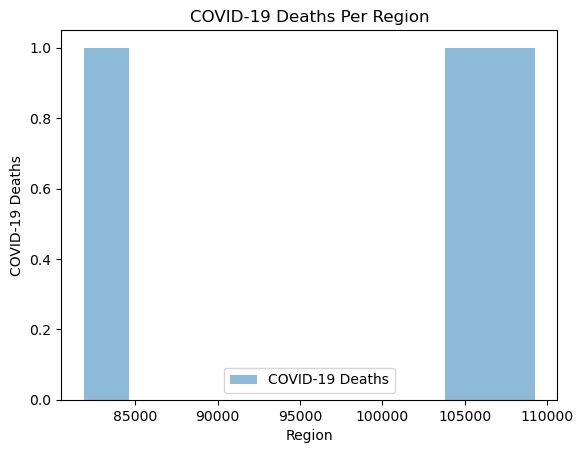

In [72]:
large_states['COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True,)
plt.title('COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

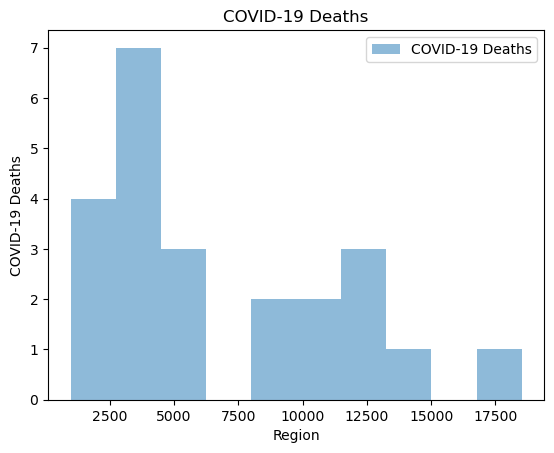

In [74]:
small_states_rows['COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True,)
plt.title('COVID-19 Deaths')
plt.xlabel('Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

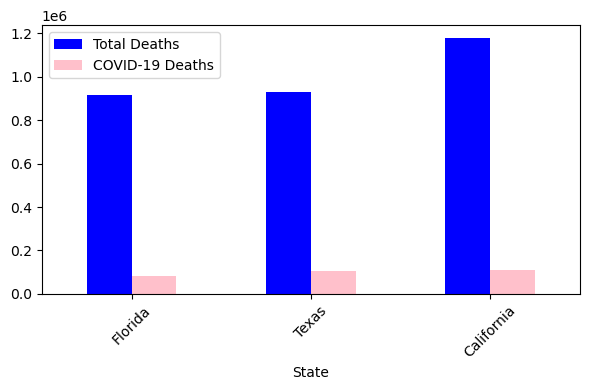

In [83]:
large_states_deaths = large_states.plot(kind='bar', figsize=(6,4), x='State', y=['Total Deaths', 'COVID-19 Deaths'], rot=45, color=['blue', 'pink'])
plt.tight_layout()

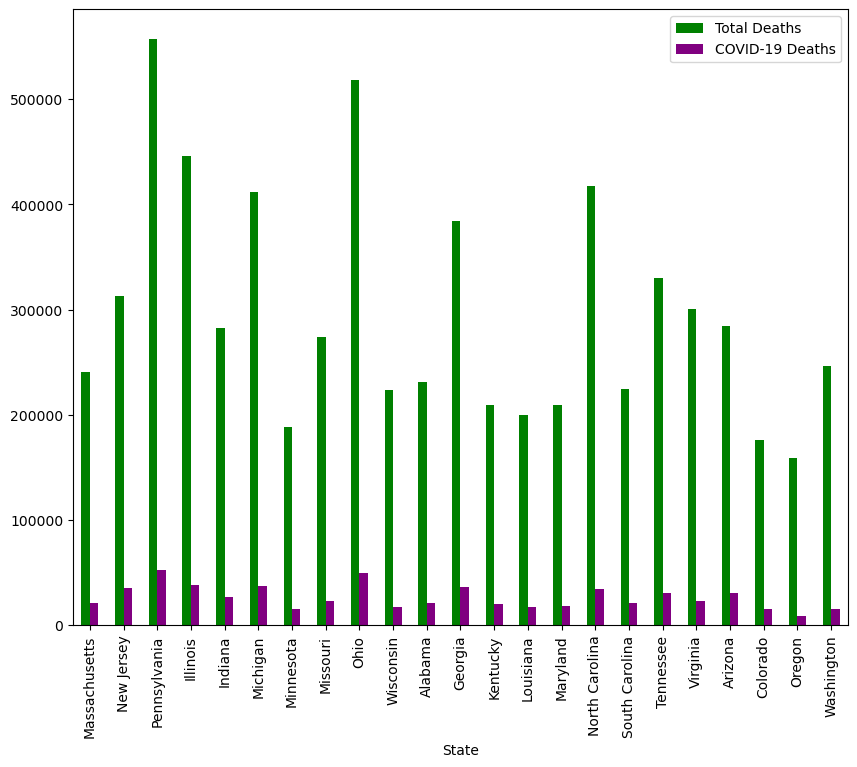

In [84]:
medium_states_deaths= medium_states_rows.plot(kind='bar',figsize=(10,8),x='State',y=['Total Deaths','COVID-19 Deaths'], rot=90,color=['green','purple'])